In [61]:
import math

def mprim(m, tau, gamma = 1):
    '''
    Modified Prim's Algorithm - for dense graphs.
    
    This is not optimized for sparse graphs.
    
    Input: m:   an adjacency matrix. Entries are the weights of the edges.
           tau: the per-unit trench cost (gamma = 1 by default)
            
    Output: the total cost and the adjacency list
    '''
    n = len(m)
    dr = [math.inf for i in range(0, n)] # Distance of vertex i to the root
    pre = [math.inf for i in range(0, n)] # current vertex in the solution tree of lowest cost
    cost = [math.inf for i in range(0, n)] # cost to add in vertex i
    cost[0] = 0 
    vt = [0 for i in range(0, n)] # vertices in the solution tree: 0 out 1 in.
    vt[0]=1 # The root is in the solution tree.
    

    # Initialize the vectors: Look at everything the root is adjacent to first.
    for i in range(1, n):
        if m[0][i]:
            pre[i] = 0 # i and 0 are adjacent.
            dr[i] = m[0][i]
            cost[i] = (tau+gamma)*m[0][i]

    # This is the key loop of MPrim.    
    for i in range(1, n):
        # Get minimum cost with index
        k = -1 # Index of the current best vertex.
        # The current minimum cost
        curmin = math.inf
        for j in range(1, n):
            if not vt[j]:
                if cost[j] < curmin:
                    curmin = cost[j]
                    k = j
        # Now the best edge is (pre[k], k) with cost cost[k].
        # Insert vertex k and edge (pre[k], k) into the solution tree.
        #print(k)
        vt[k] = 1
        
    
        # Now update the cost and pre vectors.
        for e in range(1, n):
            # if edge (k, ?) is not in the tree
            if (not vt[e]) and m[e][k]:
                if ((dr[k] + m[e][k])*gamma + tau*m[e][k]) < cost[e]:
                    dr[e] = dr[k] + m[e][k]
                    cost[e] = gamma*dr[e] + tau*m[e][k]
                    pre[e] = k
        #print(cost)
    return math.fsum(cost) #[math.fsum(cost), pre]


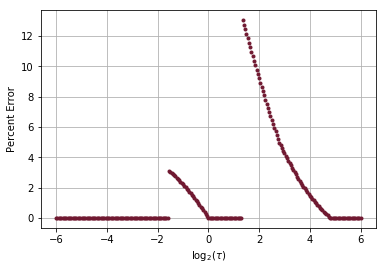

In [88]:
import math
import matplotlib.pyplot as plt

# These are the optimal costs for the graph represented by m below.
def optimal(tau):
    if tau <= 0.25:
        return 56*tau + 108
    elif tau <= 1:
        return 52*tau + 109
    elif tau <= 7:
        return 44*tau + 117
    elif tau <= 28:
        return 43*tau + 124
    else:
        return 42*tau + 152

# An adjacency matrix of a 9-vertex graph.
m = [[0, 7, 10, 8, 0, 0, 0, 0, 0], [7, 0, 0, 6, 0, 7, 0, 0, 0], [10, 0, 0, 4, 4, 0, 0, 0, 0], [8, 6, 4, 0, 6, 5, 8, 0, 0], [0, 0, 3, 6, 0, 0, 6, 8, 0], [0, 7, 0, 5, 0, 0, 4, 0, 7], [0, 0, 0, 8, 6, 4, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 0, 9], [0, 0, 0, 0, 0, 7, 5, 9, 0]]

#Step-length
h=0.05
a = -6.0 # Start with tau = 2^(-6)
b0 = 6.0 # End with tau = 2^6
b = 2**b0
psolx=[]
psoly=[]
while a < b0:
    tau = 2**a
    z = mprim(m, tau)
    psolx.append(a)
    opt = optimal(tau)
    psoly.append((z-opt)*100/opt)
    a += h
#psoly
plt.plot(psolx, psoly, '.', c='#701931')
plt.xlabel(r"$\log_2(\tau)$")
plt.ylabel("Percent Error")
plt.grid()
plt.show()

In [93]:
tau = 32
x, y = mprim(m, tau), optimal(tau)
print(x, y, (x-y)/y)

1496.0 1496 0.0


In [95]:
import numpy as np
from scipy import linalg
l = linalg.eigvals(m)
print(l)

[ 24.33677732+0.j  13.36746365+0.j   7.51190270+0.j   3.58583561+0.j
  -1.51606797+0.j  -6.85366122+0.j -14.42082144+0.j -15.03263939+0.j
 -10.97878927+0.j]


$f(x) = \sin(x)$

# Heading

## Subheading